### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pd.set_option('max_colwidth', 50)

In [22]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep="\t", index_col=0)
df

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3107 non-null   object
 1   rating             3107 non-null   int64 
 2   effectiveness      3107 non-null   object
 3   sideEffects        3107 non-null   object
 4   condition          3106 non-null   object
 5   benefitsReview     3107 non-null   object
 6   sideEffectsReview  3105 non-null   object
 7   commentsReview     3099 non-null   object
dtypes: int64(1), object(7)
memory usage: 218.5+ KB


In [24]:
df['urlDrugName'].value_counts()

lexapro      63
prozac       46
retin-a      45
zoloft       45
propecia     38
             ..
mirena        1
xanax-xr      1
omnitrope     1
cataflam      1
trileptal     1
Name: urlDrugName, Length: 502, dtype: int64

In [27]:
print(len(df.duplicated()))
print(sum(df.duplicated()))

3107
31


In [28]:
df[df.duplicated()]

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
1462,cymbalta,7,Considerably Effective,Mild Side Effects,depression/anxiety,Taking the medicine was only once a day at the...,Mild headache and mild stomach ache,I take Cymbalta for depression and anxiety. Ri...
3645,retin-a,6,Considerably Effective,Moderate Side Effects,acne,Since using the Retin-A along with the Accutan...,It does cause the skin to flake and peel but t...,I use Retin-A 0.25% every evening along with 7...
1865,augmentin,10,Highly Effective,No Side Effects,subungal hematoma,The medicine was taken to prevent infection si...,There were no adverse side effects. By taking...,I was prescribed Augmentin at 875mg to be take...
2723,elavil,10,Highly Effective,Mild Side Effects,chronic headaches,"Since I was very young, a child, I suffered de...",None that I noticed.,I take one 150 mg tablet of generic Elavil at ...
1852,augmentin,5,Considerably Effective,Severe Side Effects,cat bite infection,The infection cleared,"Loss of appetite, heartburn, nausea,light head...",The cat bite on my foot was very swollen and p...
2792,wellbutrin,6,Considerably Effective,Moderate Side Effects,depression,The medication treated the depression without ...,"Unfortunately, the drug seemed to correlate wi...","I was prescribed Wellbutrin, was on it for app..."
2808,wellbutrin,8,Considerably Effective,Mild Side Effects,depression,The drug worked on reducing/eliminating my sit...,"At first I had crazy dreams, whch wasn't so ba...",I started on 150 mg for 2 weeks on the brand n...
2655,diclofenac,7,Considerably Effective,Mild Side Effects,illiotibital tibital syndrom,I had swelling and pain in my knee from itbs a...,I had gas after about 6 hours of taking it,one tablet twice per day with food\r\r\ntook o...
2302,lexapro,6,Marginally Effective,No Side Effects,depression,The treatment benefits were marginal at best. ...,"On the plus side, I experienced no major side ...","The pills are administered once a day, daily, ..."
1661,climara,10,Highly Effective,Mild Side Effects,menopausal,Climara patch almost completely stopped the se...,The only side effect from the Climara is mild ...,After being miserable with frequent (20+ times...


In [29]:
df = df.drop_duplicates()
len(df)

3076

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3076 entries, 2202 to 2748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   urlDrugName        3076 non-null   object
 1   rating             3076 non-null   int64 
 2   effectiveness      3076 non-null   object
 3   sideEffects        3076 non-null   object
 4   condition          3075 non-null   object
 5   benefitsReview     3076 non-null   object
 6   sideEffectsReview  3074 non-null   object
 7   commentsReview     3068 non-null   object
dtypes: int64(1), object(7)
memory usage: 216.3+ KB


In [31]:
df.describe(include='all')

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3076,3076.000000,3076,3076,3075,3076,3074,3068
unique,502,NaN,5,5,1426,3032,2814,3047
top,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,60,NaN,1317,1007,229,20,112,6
mean,NaN,6.998375,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.944859,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df['effectiveness'].value_counts()

Highly Effective          1317
Considerably Effective     916
Moderately Effective       413
Ineffective                247
Marginally Effective       183
Name: effectiveness, dtype: int64

In [33]:
df['sideEffects'].value_counts()

Mild Side Effects                1007
No Side Effects                   918
Moderate Side Effects             609
Severe Side Effects               367
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

In [34]:
df['condition'].value_counts()

depression                                          229
acne                                                164
anxiety                                              63
insomnia                                             54
birth control                                        49
                                                   ... 
all over and various type pain                        1
excessive coughing, later diagnosed as pneumonia      1
after birth thyroid not working to mormal levelc      1
chest infection (viral)                               1
total hysterctomy                                     1
Name: condition, Length: 1426, dtype: int64

In [48]:
lista_palabras = []
for condition in df['condition'].str.split(' '):
    # print(type(condition))
    if type(condition) != float:
        for palabra in condition:
            lista_palabras.append(palabra.replace(",","").lower())
print(pd.Series(lista_palabras).value_counts()[:20])

depression    315
acne          219
anxiety       140
pain          129
and           104
infection     100
high           96
insomnia       73
disorder       67
allergies      62
control        61
birth          60
arthritis      59
blood          55
loss           55
migraine       51
pressure       51
chronic        49
to             46
reflux         45
dtype: int64


#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [49]:
pd.get_dummies(df['effectiveness'])

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
2202,0,1,0,0,0
3117,0,1,0,0,0
1146,0,1,0,0,0
3947,0,0,0,1,0
1951,0,0,0,1,0
...,...,...,...,...,...
1039,0,1,0,0,0
3281,0,0,1,0,0
1664,0,0,0,1,0
2621,1,0,0,0,0


In [50]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [51]:
my_effectiveness = {
    "Ineffective": 0,
    "Marginally Effective": 1,
    'Moderately Effective': 2,
    'Considerably Effective': 3,
    'Highly Effective': 4
}

df['effectiveness_int'] = df['effectiveness'].map(my_effectiveness)
df

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_19540\2773269201.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['effectiveness_int'] = df['effectiveness'].map(my_effectiveness)


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1
...,...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...",4
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,0
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,1
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,3


In [53]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [54]:
my_sideEffects = {
    'No Side Effects': 0,
    'Mild Side Effects': 1,
    'Moderate Side Effects': 2,
    'Severe Side Effects': 3,
    'Extremely Severe Side Effects': 4
}

df['sideEffects_int'] = df['sideEffects'].map(my_sideEffects)
df

C:\Users\Miguel Angel\AppData\Local\Temp\ipykernel_19540\594614603.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sideEffects_int'] = df['sideEffects'].map(my_sideEffects)


,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview,effectiveness_int,sideEffects_int
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...",4,1
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...",4,3
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...,4,0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...,1,1
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above,1,3
...,...,...,...,...,...,...,...,...,...,...
1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m...",4,1
3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...,0,4
1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---,1,2
2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...,3,1


In [55]:
X = df[['rating', 'effectiveness_int', 'sideEffects_int']]
print(X.shape)

(3076, 3)


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

#### Genera el K Means 

In [57]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [59]:
model = KMeans(n_init="auto")
model.fit(X)
model.predict(X)

array([1, 5, 7, ..., 3, 4, 1])

In [60]:
model.score(X)

-3589.344513706123

In [61]:
silhouette_score(X, model.predict(X))

0.38814703654216237

In [72]:
km_list = [KMeans(n_clusters=k, n_init='auto').fit(X) for k in range(2,50)]
km_list

[KMeans(n_clusters=2, n_init='auto'),
 KMeans(n_clusters=3, n_init='auto'),
 KMeans(n_clusters=4, n_init='auto'),
 KMeans(n_clusters=5, n_init='auto'),
 KMeans(n_clusters=6, n_init='auto'),
 KMeans(n_clusters=7, n_init='auto'),
 KMeans(n_init='auto'),
 KMeans(n_clusters=9, n_init='auto'),
 KMeans(n_clusters=10, n_init='auto'),
 KMeans(n_clusters=11, n_init='auto'),
 KMeans(n_clusters=12, n_init='auto'),
 KMeans(n_clusters=13, n_init='auto'),
 KMeans(n_clusters=14, n_init='auto'),
 KMeans(n_clusters=15, n_init='auto'),
 KMeans(n_clusters=16, n_init='auto'),
 KMeans(n_clusters=17, n_init='auto'),
 KMeans(n_clusters=18, n_init='auto'),
 KMeans(n_clusters=19, n_init='auto'),
 KMeans(n_clusters=20, n_init='auto'),
 KMeans(n_clusters=21, n_init='auto'),
 KMeans(n_clusters=22, n_init='auto'),
 KMeans(n_clusters=23, n_init='auto'),
 KMeans(n_clusters=24, n_init='auto'),
 KMeans(n_clusters=25, n_init='auto'),
 KMeans(n_clusters=26, n_init='auto'),
 KMeans(n_clusters=27, n_init='auto'),
 KMeans(

In [73]:
silhouette_score_list = [silhouette_score(X, model.labels_) for model in km_list]
silhouette_score_list

[0.6202329963099731,
 0.4541698281460479,
 0.41608629061994756,
 0.4132760858235748,
 0.38817250800604197,
 0.4104976312195405,
 0.3627958558899251,
 0.37282786562308745,
 0.38174608257838694,
 0.43000797161876503,
 0.4152483853357304,
 0.4010783684745715,
 0.45904079125061,
 0.44287899750490567,
 0.44413742831898,
 0.4489113400834793,
 0.45058304320069753,
 0.4868667236076623,
 0.4605436612088108,
 0.5150092188470797,
 0.5128634908074012,
 0.5215947517734445,
 0.5372227642648001,
 0.574024770330981,
 0.5851961143098041,
 0.599710222431324,
 0.5947353688974678,
 0.6017426085943292,
 0.5971765648527311,
 0.6325236172939593,
 0.6325399450656101,
 0.622402287800706,
 0.6447222804909964,
 0.6732179604249828,
 0.6695473729660147,
 0.6804411771969711,
 0.6789139461185708,
 0.704195489082902,
 0.7023927659965462,
 0.6963399643094492,
 0.705259457288189,
 0.7000245632215553,
 0.7155932842994331,
 0.7333371100111127,
 0.7397562384132473,
 0.7414261588577498,
 0.7417801384960668,
 0.740188015684

Text(0, 0.5, 'silhouette_score')

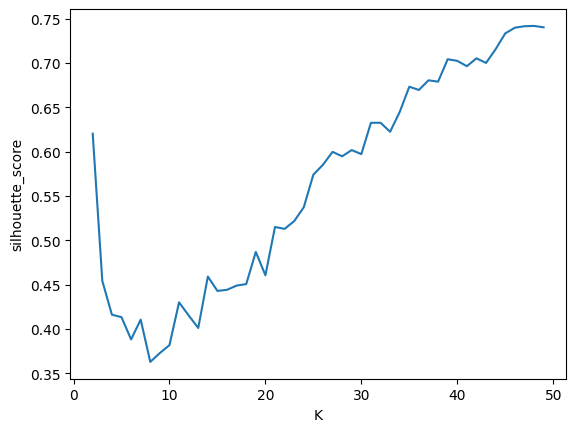

In [74]:
plt.plot(range(2,50), silhouette_score_list)
plt.xlabel("K")
plt.ylabel("silhouette_score")

Text(0, 0.5, 'inertia')

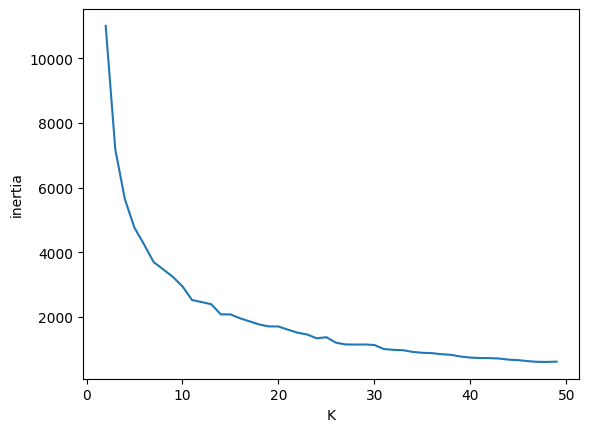

In [75]:
inertias = [model.inertia_ for model in km_list]
plt.plot(range(2,50), inertias)
plt.xlabel("K")
plt.ylabel("inertia")

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [96]:
kmeans = KMeans(n_clusters=2, n_init='auto').fit(X)
kmeans.labels_

array([1, 1, 0, ..., 1, 0, 1])

In [97]:
df_cluster = X.copy()
df_cluster['cluster'] = kmeans.labels_
df_cluster

,rating,effectiveness_int,sideEffects_int,cluster
2202,4,4,1,1
3117,1,4,3,1
1146,10,4,0,0
3947,3,1,1,1
1951,2,1,3,1
...,...,...,...,...
1039,10,4,1,0
3281,1,0,4,1
1664,2,1,2,1
2621,8,3,1,0


In [98]:
df_cluster['cluster'].value_counts()

0    2257
1     819
Name: cluster, dtype: int64

<Axes: ylabel='cluster'>

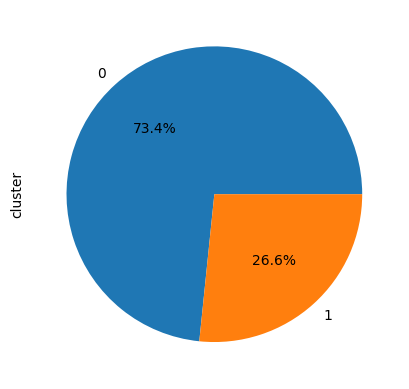

In [99]:
df_cluster['cluster'].value_counts().plot.pie(autopct="%.1f%%")

In [100]:
pd.set_option("display.max_columns", 500)

In [101]:
df_cluster.groupby('cluster').describe()

rating                                                 \
          count      mean       std  min  25%  50%   75%   max   
cluster                                                          
0        2257.0  8.573327  1.268151  5.0  8.0  9.0  10.0  10.0   
1         819.0  2.658120  1.568436  1.0  1.0  3.0   4.0   6.0   

        effectiveness_int                                               \
                    count      mean       std  min  25%  50%  75%  max   
cluster                                                                  
0                  2257.0  3.424457  0.705654  1.0  3.0  4.0  4.0  4.0   
1                   819.0  1.582418  1.358297  0.0  0.0  1.0  3.0  4.0   

        sideEffects_int                                               
                  count      mean       std  min  25%  50%  75%  max  
cluster                                                               
0                2257.0  0.882144  0.839688  0.0  0.0  1.0  1.0  4.0  
1                 819.0  2.484737  1.181851  0.0  2.0  3.0  3.0  4.0

In [102]:
kmeans.cluster_centers_

array([[8.57332743, 3.42445724, 0.88214444],
       [2.65811966, 1.58241758, 2.48473748]])

In [103]:
import plotly.express as px

fig = px.scatter_3d(df_cluster, x="rating", y="effectiveness_int", z="sideEffects_int", color='cluster')
fig.show()